### Prediction of EPL 22/23 using Pythagorean Expectation

In [1]:
#import libraries
import pandas as pd
import numpy as np


In [2]:
#import scrapped dataset
EPL22_23= pd.read_csv('EPL 2022_23 Scrapped.csv')
EPL22_23.head(10)

,Date,Time,Home Team,Away Team,FT HT,MatchDay,FT,HT,GF,GA,HGF,HGA
0,05/08/2022,20:00,Crystal Palace,Arsenal FC,0:2 (0:1),1,0:2,0:1,0,2.0,0.0,1.0
1,06/08/2022,12:30,Fulham FC,Liverpool FC,2:2 (1:0),1,2:2,1:0,2,2.0,1.0,0.0
2,06/08/2022,15:00,AFC Bournemouth,Aston Villa,2:0 (1:0),1,2:0,1:0,2,0.0,1.0,0.0
3,06/08/2022,15:00,Leeds United,Wolverhampton Wanderers,2:1 (1:1),1,2:1,1:1,2,1.0,1.0,1.0
4,06/08/2022,15:00,Newcastle United,Nottingham Forest,2:0 (0:0),1,2:0,0:0,2,0.0,0.0,0.0
5,06/08/2022,15:00,Tottenham Hotspur,Southampton FC,4:1 (2:1),1,4:1,2:1,4,1.0,2.0,1.0
6,06/08/2022,17:30,Everton FC,Chelsea FC,0:1 (0:1),1,0:1,0:1,0,1.0,0.0,1.0
7,07/08/2022,14:00,Leicester City,Brentford FC,2:2 (1:0),1,2:2,1:0,2,2.0,1.0,0.0
8,07/08/2022,14:00,Manchester United,Brighton & Hove Albion,1:2 (0:2),1,1:2,0:2,1,2.0,0.0,2.0
9,07/08/2022,16:30,West Ham United,Manchester City,0:2 (0:1),1,0:2,0:1,0,2.0,0.0,1.0


In [3]:
#filter out rescheduled fixtures
EPL22_23 = EPL22_23[EPL22_23['GF']!="resch."]

In [4]:
#change data type
EPL22_23['GF'] = EPL22_23['GF'].astype(int)
EPL22_23['Date']=EPL22_23['Date'].astype('datetime64[ns]')

Create columns
> `FTR` = Fulltime Results (H is Home win, D is Draw, A is away Win)

> `GA` = Goals Against

> `GF` = Goals Scored

> `P` = Number of Matches Played

>`hwin` = home win
>`awin` = away win

In [5]:
EPL22_23['FTR']=np.where(EPL22_23['GF']>EPL22_23['GA'],'H',np.where(EPL22_23['GF']==EPL22_23['GA'],'D','A'))
EPL22_23['P']=1
EPL22_23['hwin']=np.where(EPL22_23['FTR']=='H',1.0,np.where(EPL22_23['FTR']=='A',0.,0.5))
EPL22_23['awin']=np.where(EPL22_23['FTR']=='A',1.0,np.where(EPL22_23['FTR']=='H',0.,0.5))
EPL22_23

,Date,Time,Home Team,Away Team,FT HT,MatchDay,FT,HT,GF,GA,HGF,HGA,FTR,P,hwin,awin
0,2022-05-08,20:00,Crystal Palace,Arsenal FC,0:2 (0:1),1,0:2,0:1,0,2.0,0.0,1.0,A,1,0.0,1.0
1,2022-06-08,12:30,Fulham FC,Liverpool FC,2:2 (1:0),1,2:2,1:0,2,2.0,1.0,0.0,D,1,0.5,0.5
2,2022-06-08,15:00,AFC Bournemouth,Aston Villa,2:0 (1:0),1,2:0,1:0,2,0.0,1.0,0.0,H,1,1.0,0.0
3,2022-06-08,15:00,Leeds United,Wolverhampton Wanderers,2:1 (1:1),1,2:1,1:1,2,1.0,1.0,1.0,H,1,1.0,0.0
4,2022-06-08,15:00,Newcastle United,Nottingham Forest,2:0 (0:0),1,2:0,0:0,2,0.0,0.0,0.0,H,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2022-12-11,15:00,West Ham United,Leicester City,0:2 (0:1),16,0:2,0:1,0,2.0,0.0,1.0,A,1,0.0,1.0
156,2022-12-11,17:30,Newcastle United,Chelsea FC,1:0 (0:0),16,1:0,0:0,1,0.0,0.0,0.0,H,1,1.0,0.0
157,2022-12-11,19:45,Wolverhampton Wanderers,Arsenal FC,0:2 (0:0),16,0:2,0:0,0,2.0,0.0,0.0,A,1,0.0,1.0
158,2022-11-13,14:00,Brighton & Hove Albion,Aston Villa,1:2 (1:1),16,1:2,1:1,1,2.0,1.0,1.0,A,1,0.0,1.0


In [6]:
# split to home & away
EPL_Home = EPL22_23[['Date','Home Team','Away Team','MatchDay','GF','GA','FTR','P','hwin','awin']]
EPL_HomeTeam = EPL_Home[['Date','Home Team','GF','GA', 'FTR','P','hwin']]
EPL_AwayTeam = EPL_Home[['Date','Away Team','GA','GF', 'FTR','P','awin']]


In [7]:
# group by home team & away team
EPL_22_H=EPL_HomeTeam.groupby('Home Team')[['GF','GA','FTR','P','hwin']].sum()
EPL_22_A=EPL_AwayTeam.groupby('Away Team')[['GF','GA','FTR','P','awin']].sum()

In [8]:
#rename hwin to win
EPL_22_H.rename(columns={'hwin':'win'},inplace=True)

In [9]:
#rename awin to win and rename GF to GA since it is GF is always from the perspective of the Home team
EPL_22_A.rename(columns={'GF':'GA','GA':'GF','awin':'win'},inplace=True)

#### Merge away & home

In [10]:
EPL_22= pd.concat([EPL_22_H,EPL_22_A]).reset_index()

In [11]:
EPL_22=EPL_22.groupby('index').sum().reset_index()

In [12]:
EPL_22.rename(columns={'index':'Team'},inplace=True)

#### Define pythagorean expectation
>`pyth` = `Goals Scored`^2/(`Goals Scored`+`Goals Conceded`^2)

In [13]:
EPL_22['wpc']=EPL_22['win']/EPL_22['P']
EPL_22['pyth']=EPL_22['GF']**2/(EPL_22['GF']**2+EPL_22['GA']**2)
EPL_22['diff']=EPL_22['pyth']-EPL_22['wpc']
EPL_22

,Team,GF,GA,P,win,wpc,pyth,diff
0,AFC Bournemouth,18.0,32.0,15,6.0,0.400000,0.240356,-0.159644
1,Arsenal FC,33.0,11.0,14,12.5,0.892857,0.900000,0.007143
2,Aston Villa,16.0,22.0,15,6.5,0.433333,0.345946,-0.087387
3,Brentford FC,23.0,25.0,15,7.5,0.500000,0.458406,-0.041594
4,Brighton & Hove Albion,23.0,19.0,14,7.5,0.535714,0.594382,0.058668
5,Chelsea FC,17.0,17.0,14,7.5,0.535714,0.500000,-0.035714
6,Crystal Palace,15.0,18.0,14,7.0,0.500000,0.409836,-0.090164
7,Everton FC,11.0,17.0,15,5.5,0.366667,0.295122,-0.071545
8,Fulham FC,24.0,26.0,15,7.0,0.466667,0.460064,-0.006603
9,Leeds United,22.0,26.0,14,5.5,0.392857,0.417241,0.024384


In [14]:
EPL_22.sort_values('pyth',ascending=False).reset_index(drop=True)

,Team,GF,GA,P,win,wpc,pyth,diff
0,Arsenal FC,33.0,11.0,14,12.5,0.892857,0.900000,0.007143
1,Manchester City,40.0,14.0,14,11.0,0.785714,0.890869,0.105154
2,Newcastle United,29.0,11.0,15,11.0,0.733333,0.874220,0.140887
3,Liverpool FC,28.0,17.0,14,8.0,0.571429,0.730662,0.159233
4,Tottenham Hotspur,31.0,21.0,15,10.0,0.666667,0.685449,0.018783
5,Brighton & Hove Albion,23.0,19.0,14,7.5,0.535714,0.594382,0.058668
6,Leicester City,25.0,25.0,15,6.0,0.400000,0.500000,0.100000
7,Chelsea FC,17.0,17.0,14,7.5,0.535714,0.500000,-0.035714
8,Manchester United,20.0,20.0,14,9.0,0.642857,0.500000,-0.142857
9,Fulham FC,24.0,26.0,15,7.0,0.466667,0.460064,-0.006603


### Premier League Prediction using Pythagorean Expectations (6th Nov, 2022)

In [15]:
EPL_22 = EPL_22.sort_values('pyth',ascending=False).reset_index(drop=True)
EPL_22

,Team,GF,GA,P,win,wpc,pyth,diff
0,Arsenal FC,33.0,11.0,14,12.5,0.892857,0.900000,0.007143
1,Manchester City,40.0,14.0,14,11.0,0.785714,0.890869,0.105154
2,Newcastle United,29.0,11.0,15,11.0,0.733333,0.874220,0.140887
3,Liverpool FC,28.0,17.0,14,8.0,0.571429,0.730662,0.159233
4,Tottenham Hotspur,31.0,21.0,15,10.0,0.666667,0.685449,0.018783
5,Brighton & Hove Albion,23.0,19.0,14,7.5,0.535714,0.594382,0.058668
6,Leicester City,25.0,25.0,15,6.0,0.400000,0.500000,0.100000
7,Chelsea FC,17.0,17.0,14,7.5,0.535714,0.500000,-0.035714
8,Manchester United,20.0,20.0,14,9.0,0.642857,0.500000,-0.142857
9,Fulham FC,24.0,26.0,15,7.0,0.466667,0.460064,-0.006603


### Current League Table  (02/02/2023)

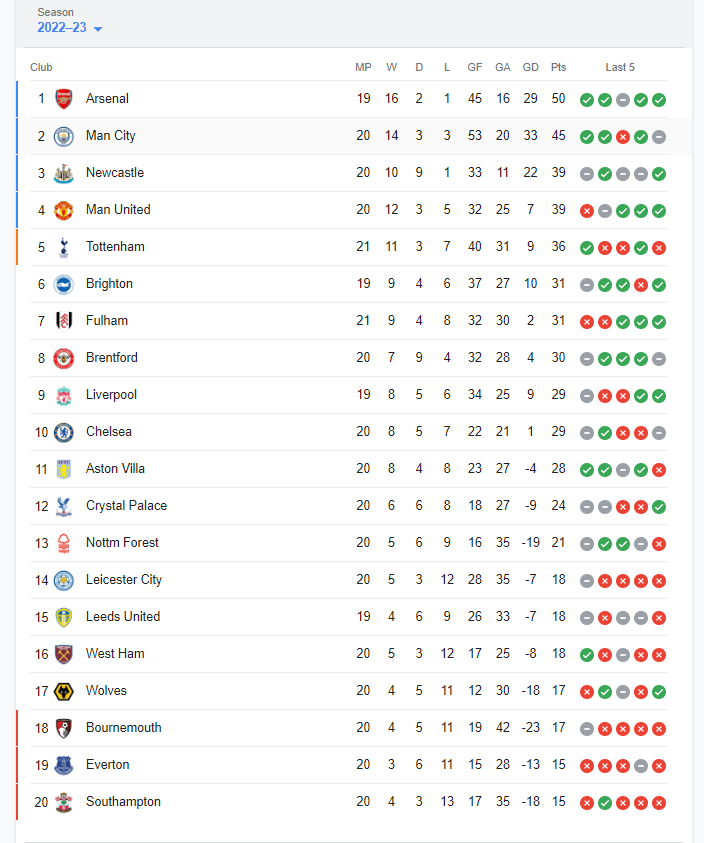